##  Решаем задачу проекта с помощью нейросетей.  
# CNN, LSTM, GRU

В данном разделе действуем по стандартному алгоритму:  
* предварительная подготовка и очистка текста 
* составление общего словаря для всех текстов, участвующих в классификации
* замена слов на числа — уникальный номер слова в нашем словаре
* выравнивание длины каждого текста до нужного размера
* применение к представленным в таком виде данным различных алгоритмов классификации

## SETUP

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# загружаем библиотеки
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU, SpatialDropout1D
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import utils
from tensorflow.keras import regularizers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split

In [4]:
PATH = 'drive/MyDrive/data/diplom_final/'
# PATH = ''

## EDA ...

Подразумеваем, что все данные прошли предварительную обработку в рамках diplom_EDA.jpynb 

## Load preprocessing data

In [5]:
# загружаем предобработанные данные
df = pd.read_csv(PATH+'data_prepare.csv', sep=',')
df.head()

,class,description,numbers
0,Поддержка товаров,товар коллега клиент позвонить сообщить товар ...,25
1,Fiji,проблема открытие зацепка открытие зацепка поя...,16
2,Export buildman,отправляться локальный проверка отправка локал...,12
3,API,находиться адрес число название представлять к...,37
4,Личный Кабинет,заходить лк попасть личный кабинет делать этаж...,8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9811 entries, 0 to 9810
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        9811 non-null   object
 1   description  9811 non-null   object
 2   numbers      9811 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 230.1+ KB


In [34]:
# Максимальное количество слов 
num_words = 50000
# Максимальная длина обращения
max_description_len = 100
# Количество классов обращения
nb_classes = 12

In [35]:
df.head()

,class,description,numbers,class_code
0,Поддержка товаров,товар коллега клиент позвонить сообщить товар ...,25,10
1,Fiji,проблема открытие зацепка открытие зацепка поя...,16,4
2,Export buildman,отправляться локальный проверка отправка локал...,12,3
3,API,находиться адрес число название представлять к...,37,0
4,Личный Кабинет,заходить лк попасть личный кабинет делать этаж...,8,8


In [36]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['class']) 
label_encoder.transform(df['class']) 

array([10,  4,  3, ...,  2, 10,  8])

In [37]:
df['class_code'] = label_encoder.transform(df['class']) 

In [38]:
df.head()

,class,description,numbers,class_code
0,Поддержка товаров,товар коллега клиент позвонить сообщить товар ...,25,10
1,Fiji,проблема открытие зацепка открытие зацепка поя...,16,4
2,Export buildman,отправляться локальный проверка отправка локал...,12,3
3,API,находиться адрес число название представлять к...,37,0
4,Личный Кабинет,заходить лк попасть личный кабинет делать этаж...,8,8


In [39]:
y = df['class_code']
X = df['description']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, shuffle=True, random_state=42)

In [41]:
y_train.head()

8929    4
7839    7
33      9
7407    5
5130    8
Name: class_code, dtype: int64

In [42]:
y_train = utils.to_categorical(y_train, nb_classes)
y_test = utils.to_categorical(y_test, nb_classes)

In [43]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [44]:
y_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [45]:
# создаем токенизатор
tokenizer = Tokenizer(num_words=num_words)

In [46]:
# обучаем токенизатор на описаниях
description = df['description']
tokenizer.fit_on_texts(description)

In [47]:
tokenizer.word_index

{'клиент': 1,
 'отзыв': 2,
 'компания': 3,
 'лк': 4,
 'доступ': 5,
 'карточка': 6,
 'фирма': 7,
 'проблема': 8,
 'карта': 9,
 'апи': 10,
 'товар': 11,
 'коллега': 12,
 'личный': 13,
 'блокировать': 14,
 'удалить': 15,
 'вопрос': 16,
 'кабинет': 17,
 'город': 18,
 'заявка': 19,
 'работать': 20,
 'реклама': 21,
 'рубрика': 22,
 'пользователь': 23,
 'информация': 24,
 'номер': 25,
 'дать': 26,
 'инфораша': 27,
 'адрес': 28,
 'менеджер': 29,
 'проект': 30,
 'сайт': 31,
 'добавить': 32,
 'сборка': 33,
 'ссылка': 34,
 'сделать': 35,
 'модерация': 36,
 'этаж': 37,
 'запрос': 38,
 'рд': 39,
 'телефон': 40,
 'подсказать': 41,
 'ответ': 42,
 'специалист': 43,
 'помочь': 44,
 'данный': 45,
 'рекламный': 46,
 'ул': 47,
 'сервис': 48,
 'код': 49,
 'продажа': 50,
 'заказ': 51,
 'сеть': 52,
 'проверка': 53,
 'джир': 54,
 'витрина': 55,
 'связь': 56,
 'возможность': 57,
 'отдел': 58,
 'объект': 59,
 'версия': 60,
 'отсутствовать': 61,
 'размещение': 62,
 'вложение': 63,
 'необходимо': 64,
 'поиск': 65

In [48]:
# преобразуем описания train в числовое представление
sequences_train = tokenizer.texts_to_sequences(X_train)

In [49]:
X_train_new = pad_sequences(sequences_train, maxlen=max_description_len)

In [50]:
X_train_new.shape

(8829, 100)

In [51]:
# преобразуем описания test в числовое представление
sequences_test = tokenizer.texts_to_sequences(X_test)

In [52]:
X_test_new = pad_sequences(sequences_test, maxlen=max_description_len)

In [53]:
X_test_new.shape

(982, 100)

In [54]:
X_test_new

array([[   0,    0,    0, ..., 5339, 3564, 2207],
       [   0,    0,    0, ...,   48,   10,   10],
       [   0,    0,    0, ...,  287,  491,  105],
       ...,
       [   0,    0,    0, ..., 4289,  653, 8684],
       [   0,    0,    0, ...,   20,  486,   44],
       [   0,    0,    0, ...,  196, 1553,   34]], dtype=int32)

### Сверточная нейронная сеть (CNN)

In [60]:
model_cnn = Sequential()
model_cnn.add(Embedding(num_words, 32, input_length=max_description_len))
model_cnn.add(Conv1D(256, 5, padding='valid', activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(100, activation='relu'))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(12, activation='softmax'))

In [61]:
model_cnn.compile(optimizer='adamax', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [62]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 32)           1600000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 96, 256)           41216     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               25700     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 12)                1212      
Total params: 1,668,128
Trainable params: 1,668,128
Non-trainable params: 0
____________________________________________

In [63]:
model_cnn_save_path = 'best_model_cnn.h5'
checkpoint_callback_cnn = ModelCheckpoint(model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [64]:
history_cnn = model_cnn.fit(X_train_new, 
                            y_train, 
                            epochs=20,
                            batch_size=16,
                            validation_split=0.1,
                            callbacks=[checkpoint_callback_cnn])

Epoch 1/20
497/497 [==============================] - 3s 4ms/step - loss: 2.2801 - accuracy: 0.2470 - val_loss: 1.3132 - val_accuracy: 0.6082

Epoch 00001: val_accuracy improved from -inf to 0.60815, saving model to best_model_cnn.h5
Epoch 2/20
497/497 [==============================] - 2s 4ms/step - loss: 1.2055 - accuracy: 0.6142 - val_loss: 0.8686 - val_accuracy: 0.7758

Epoch 00002: val_accuracy improved from 0.60815 to 0.77576, saving model to best_model_cnn.h5
Epoch 3/20
497/497 [==============================] - 2s 4ms/step - loss: 0.8162 - accuracy: 0.7716 - val_loss: 0.6329 - val_accuracy: 0.8267

Epoch 00003: val_accuracy improved from 0.77576 to 0.82673, saving model to best_model_cnn.h5
Epoch 4/20
497/497 [==============================] - 2s 4ms/step - loss: 0.6360 - accuracy: 0.8132 - val_loss: 0.5444 - val_accuracy: 0.8414

Epoch 00004: val_accuracy improved from 0.82673 to 0.84145, saving model to best_model_cnn.h5
Epoch 5/20
497/497 [==============================] - 2

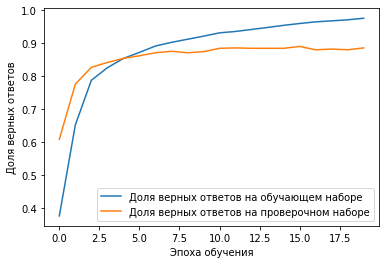

In [65]:
plt.plot(history_cnn.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_cnn.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

### Cеть LSTM

Первый слой - это встроенный слой, который использует 100 векторов длины для представления каждого слова.
SpatialDropout1D выполняет вариационный отсев в моделях НЛП.
Следующий уровень - это уровень LSTM с 64 единицами памяти.
Выходной слой должен создать 13 выходных значений, по одному для каждого класса.
Функция активации - softmax для мультиклассовой классификации.
Поскольку это категориальная проблема классификации, в качестве функции потерь используется categoryor_crossentropy.

In [103]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 128, input_length=max_description_len))
model_lstm.add(SpatialDropout1D(0.8))
model_lstm.add(Bidirectional(LSTM(128, activity_regularizer=regularizers.l2(1e-4), return_sequences=True)))
model_lstm.add(Dropout(0.4))
model_lstm.add(Bidirectional(LSTM(64, activity_regularizer=regularizers.l2(1e-4))))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(12, activation='softmax'))

In [104]:
model_lstm.compile(optimizer='adamax', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [105]:
model_lstm.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 100, 128)          6400000   
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 100, 128)          0         
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 100, 256)          263168    
_________________________________________________________________
dropout_13 (Dropout)         (None, 100, 256)          0         
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 128)               164352    
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)              

In [106]:
model_lstm_save_path = 'best_model_lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)
earlystop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
callbacks_ltsm_list = [checkpoint_callback_lstm, earlystop]

In [107]:
history_lstm = model_lstm.fit(X_train_new, 
                              y_train, 
                              epochs=1000,
                              batch_size=16,
                              validation_split=0.1,
                              callbacks=[callbacks_ltsm_list])

Epoch 1/1000
497/497 [==============================] - 16s 22ms/step - loss: 2.4398 - accuracy: 0.1140 - val_loss: 2.0049 - val_accuracy: 0.3194

Epoch 00001: val_accuracy improved from -inf to 0.31937, saving model to best_model_lstm.h5
Epoch 2/1000
497/497 [==============================] - 10s 20ms/step - loss: 2.0271 - accuracy: 0.2561 - val_loss: 1.5921 - val_accuracy: 0.4054

Epoch 00002: val_accuracy improved from 0.31937 to 0.40544, saving model to best_model_lstm.h5
Epoch 3/1000
497/497 [==============================] - 10s 20ms/step - loss: 1.7103 - accuracy: 0.3843 - val_loss: 1.3504 - val_accuracy: 0.5153

Epoch 00003: val_accuracy improved from 0.40544 to 0.51529, saving model to best_model_lstm.h5
Epoch 4/1000
497/497 [==============================] - 10s 19ms/step - loss: 1.5386 - accuracy: 0.4470 - val_loss: 1.2284 - val_accuracy: 0.5549

Epoch 00004: val_accuracy improved from 0.51529 to 0.55493, saving model to best_model_lstm.h5
Epoch 5/1000
497/497 [=============

In [108]:
model_lstm.load_weights(model_lstm_save_path)
test_loss, test_acc = model_lstm.evaluate(X_test_new, y_test, verbose=1)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

31/31 [==============================] - 0s 13ms/step - loss: 0.4465 - accuracy: 0.8941
Test Loss: 0.44654834270477295
Test Accuracy: 0.8940936923027039


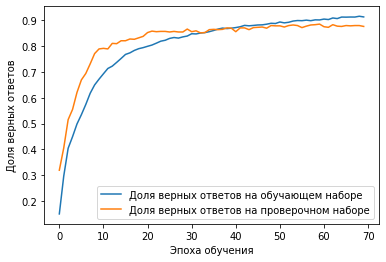

In [109]:
plt.plot(history_lstm.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_lstm.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

### Cеть GRU

In [75]:
model_gru = Sequential()
model_gru.add(Embedding(num_words, 32, input_length=max_description_len))
model_gru.add(GRU(128))
model_gru.add(Dense(12, activation='softmax'))

In [76]:
model_gru.compile(optimizer='adamax', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [77]:
model_gru.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 32)           1600000   
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               62208     
_________________________________________________________________
dense_9 (Dense)              (None, 12)                1548      
Total params: 1,663,756
Trainable params: 1,663,756
Non-trainable params: 0
_________________________________________________________________


In [78]:
model_gru_save_path = 'best_model_gru.h5'
checkpoint_callback_gru = ModelCheckpoint(model_gru_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [79]:
history_gru = model_gru.fit(X_train_new, 
                              y_train, 
                              epochs=30,
                              batch_size=16,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_gru])

Epoch 1/30
497/497 [==============================] - 5s 7ms/step - loss: 2.3801 - accuracy: 0.1809 - val_loss: 1.7794 - val_accuracy: 0.4009

Epoch 00001: val_accuracy improved from -inf to 0.40091, saving model to best_model_gru.h5
Epoch 2/30
497/497 [==============================] - 3s 6ms/step - loss: 1.6008 - accuracy: 0.4484 - val_loss: 1.3152 - val_accuracy: 0.5651

Epoch 00002: val_accuracy improved from 0.40091 to 0.56512, saving model to best_model_gru.h5
Epoch 3/30
497/497 [==============================] - 3s 6ms/step - loss: 1.2067 - accuracy: 0.6253 - val_loss: 1.1054 - val_accuracy: 0.6557

Epoch 00003: val_accuracy improved from 0.56512 to 0.65572, saving model to best_model_gru.h5
Epoch 4/30
497/497 [==============================] - 3s 6ms/step - loss: 1.0168 - accuracy: 0.7016 - val_loss: 1.0145 - val_accuracy: 0.7055

Epoch 00004: val_accuracy improved from 0.65572 to 0.70555, saving model to best_model_gru.h5
Epoch 5/30
497/497 [==============================] - 3

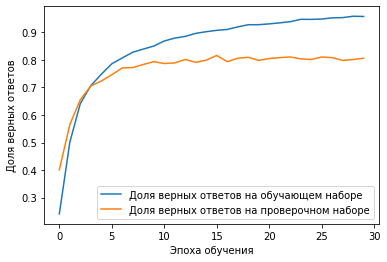

In [80]:
plt.plot(history_gru.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_gru.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Проверка на данных для тестирования

### CNN

In [110]:
model_cnn.load_weights(model_cnn_save_path)

In [111]:
model_cnn.evaluate(X_test_new, y_test, verbose=1)

31/31 [==============================] - 0s 3ms/step - loss: 0.3953 - accuracy: 0.8900


[0.3952941596508026, 0.8900203704833984]

### LTSM

In [112]:
model_lstm.load_weights(model_lstm_save_path)

In [113]:
model_lstm.evaluate(X_test_new, y_test, verbose=1)

31/31 [==============================] - 0s 14ms/step - loss: 0.4465 - accuracy: 0.8941


[0.44654834270477295, 0.8940936923027039]

### GRU

In [114]:
model_gru.load_weights(model_gru_save_path)

In [115]:
model_gru.evaluate(X_test_new, y_test, verbose=1)

31/31 [==============================] - 0s 5ms/step - loss: 0.7242 - accuracy: 0.8086


[0.7242315411567688, 0.8085539937019348]

Из трех моделей наилучший результат показала модель LSTM

##  Итог:  
В ходе решения изменялись структуры сетей, количество эпох, фунции активации, batch_size, велась борьба с переобучением. Колличество эпох осмысленно ставил заведо больше, в рассчете на остановку EarlyStop. Обсчет моделей выполнялся на выделенной машине с GPU.  
Лучший результат показала сеть на основе LSTM. Сеть GRU "проиграла" по определению из-за своей упрощенной структуры. 